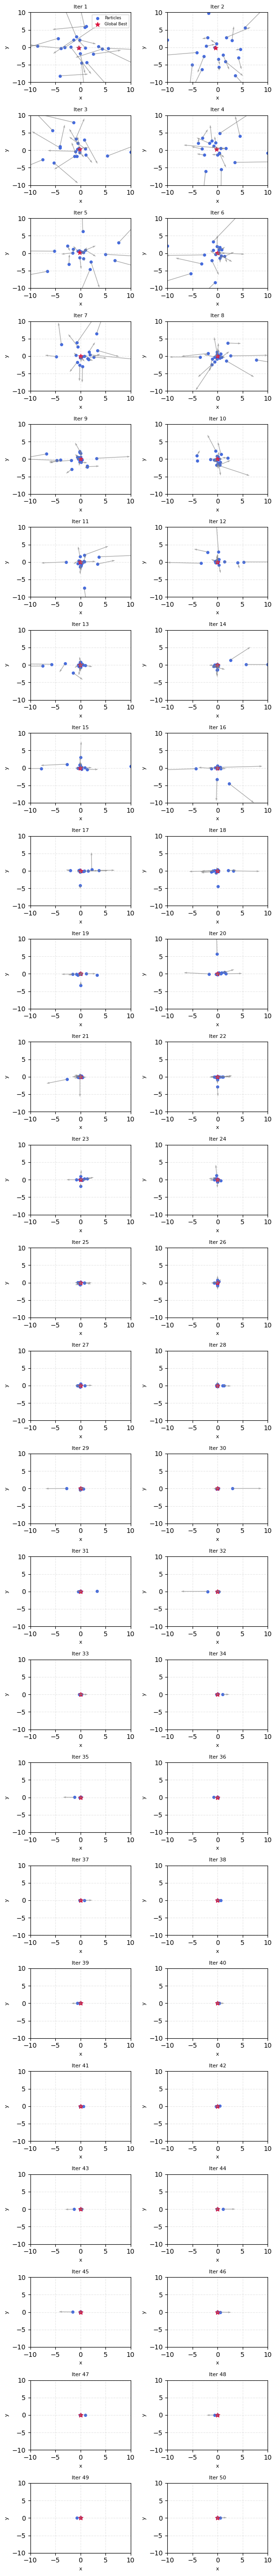

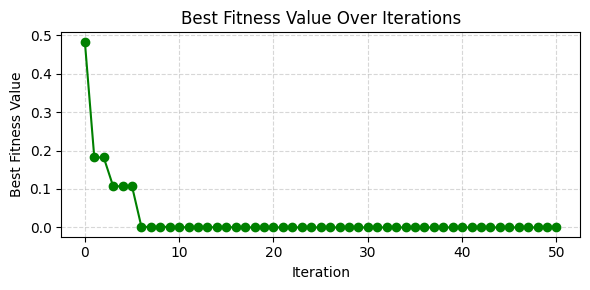

***** Final Output *****
Best solution found:
x = -0.000043
y = -0.000069
Objective function value at this point: 0.00000001


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, y):
    return x**2 + y**2

num_particles = 20
num_iterations = 50
w = 0.5
c1 = 2.0
c2 = 2.0
bounds = [-10, 10]

positions = np.random.uniform(bounds[0], bounds[1], (num_particles, 2))
velocities = np.random.uniform(-1, 1, (num_particles, 2))

pbest_positions = positions.copy()
pbest_values = objective_function(positions[:,0], positions[:,1])
gbest_index = np.argmin(pbest_values)
gbest_position = pbest_positions[gbest_index].copy()
gbest_value = pbest_values[gbest_index]
gbest_history = [gbest_value]

fig, axes = plt.subplots(
    nrows=(num_iterations+1)//2,
      ncols=2,
       figsize=(6, (num_iterations//2)*2.2)
)
axes = axes.flatten()

for iteration in range(1, num_iterations+1):
    r1 = np.random.rand(num_particles, 2)
    r2 = np.random.rand(num_particles, 2)
    velocities = (
        w * velocities
        + c1 * r1 * (pbest_positions - positions)
        + c2 * r2 * (gbest_position - positions)
    )
    positions += velocities
    positions = np.clip(positions, bounds[0], bounds[1])
    fitness = objective_function(positions[:,0], positions[:,1])

    better_mask = fitness < pbest_values
    pbest_positions[better_mask] = positions[better_mask]
    pbest_values[better_mask] = fitness[better_mask]
    
    min_index = np.argmin(pbest_values)
    if pbest_values[min_index] < gbest_value:
        gbest_value = pbest_values[min_index]
        gbest_position = pbest_positions[min_index].copy()
    gbest_history.append(gbest_value)

    ax = axes[iteration-1]
    ax.scatter(positions[:,0], positions[:,1], color='royalblue', label='Particles', s=15)
    ax.scatter(gbest_position[0], gbest_position[1], color='crimson', marker='*', s=50, label='Global Best')
    ax.quiver(
        positions[:,0], positions[:,1], velocities[:,0], velocities[:,1],
        angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.7, width=0.006
    )
    ax.set_xlim(bounds[0], bounds[1])
    ax.set_ylim(bounds[0], bounds[1])
    ax.set_title(f'Iter {iteration}', fontsize=8)
    ax.set_xlabel('x', fontsize=8)
    ax.set_ylabel('y', fontsize=8)
    if iteration == 1:
        ax.legend(fontsize=6, loc='upper right')
    ax.grid(True, linestyle='--', alpha=0.3)

for j in range(num_iterations, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
plt.plot(gbest_history, marker='o', color='green')
plt.title("Best Fitness Value Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness Value")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("***** Final Output *****")
print("Best solution found:")
print(f"x = {gbest_position[0]:.6f}")
print(f"y = {gbest_position[1]:.6f}")
print(f"Objective function value at this point: {gbest_value:.8f}")